First, we need to load the 'user_engagement.csv' dataset into a pandas DataFrame. We can accomplish this using the pandas library. Assuming the dataset is available in the current working directory, you can use the following code:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('user_engagement.csv')

# Display the first few rows of the DataFrame
print(df.head())

   day_of_week  promotion_value  happiness_index  daily_active_minutes
0            0        54.881350                4             72.877286
1            1        71.518937                5            101.020465
2            2        60.276338                4            117.611947
3            3        54.488318                1             95.807959
4            4        42.365480                4            143.737790


Next, we will conduct an exploratory data analysis (EDA) to understand the structure and distribution of the data. This involves generating summary statistics and visualizing the data. Here's an example of how you can perform EDA:

       day_of_week  promotion_value  happiness_index  daily_active_minutes
count  1095.000000      1095.000000      1095.000000           1095.000000
mean      2.994521        49.411712         3.049315            115.059895
std       2.001363        29.248629         1.373335             46.020584
min       0.000000         0.054596         1.000000              4.645043
25%       1.000000        24.512834         2.000000             78.886755
50%       3.000000        48.258424         3.000000            116.512984
75%       5.000000        73.705370         4.000000            149.488516
max       6.000000        99.980858         5.000000            230.961822






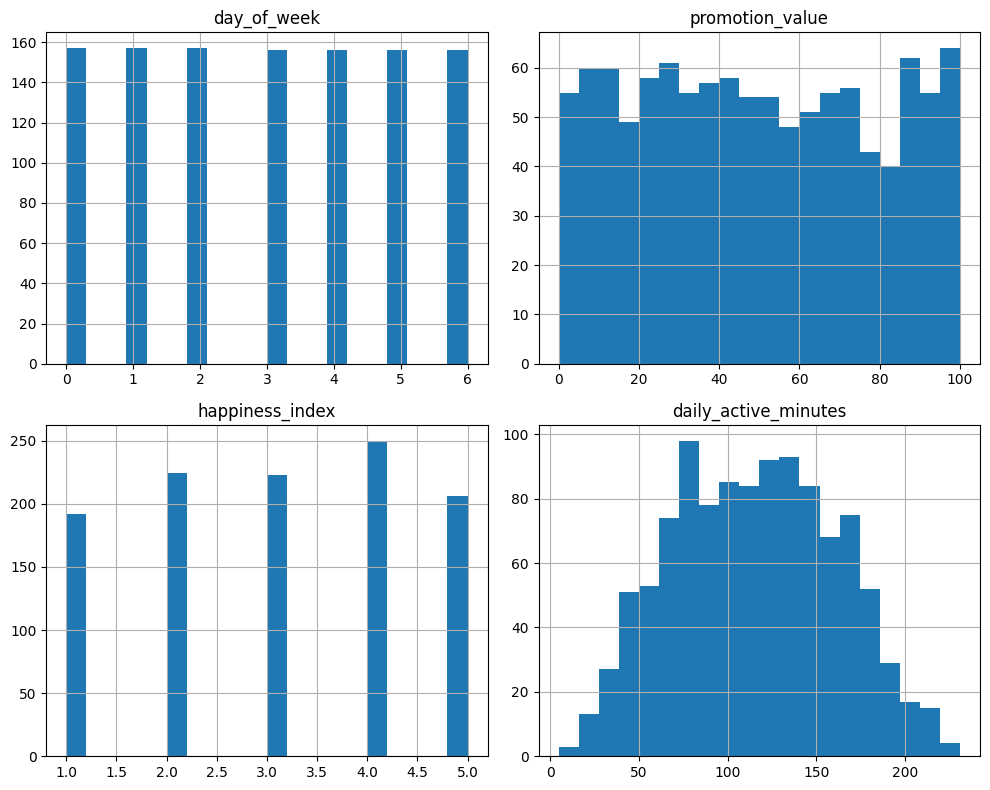

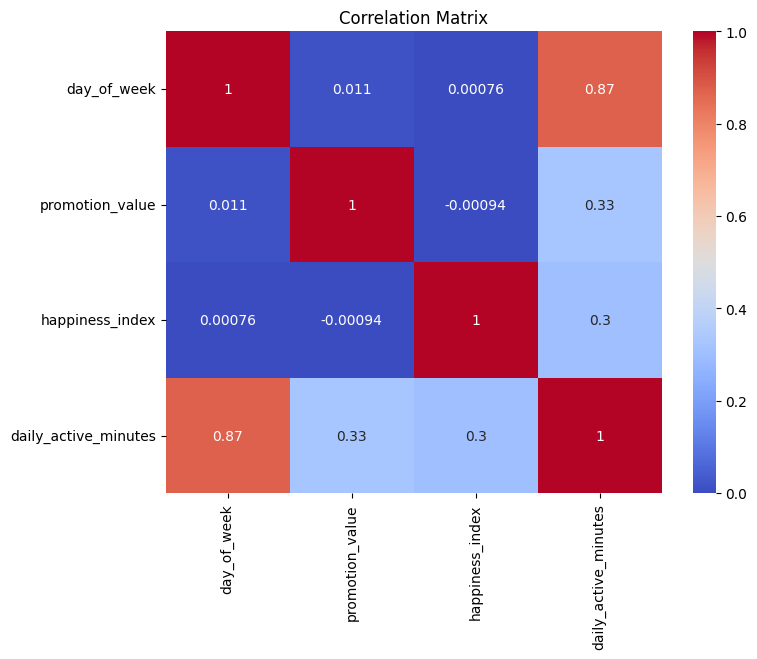

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

print("\n\n\n")

# Visualize the distribution of each feature
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

print("\n\n\n")

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

For data preparation, we need to create a feature matrix X that includes 'day_of_week', 'promotion_value', and 'happiness_index', and a target vector y with 'daily_active_minutes'. We also need to handle missing values and outliers if necessary. Here's an example:

In [ ]:
# Separate features and target
X = df[['day_of_week', 'promotion_value', 'happiness_index']]
y = df['daily_active_minutes']

# Handling missing values (if any)
X = X.fillna(X.mean())

Based on the given dataset and the task of predicting daily active minutes, it is difficult to definitively determine which machine learning model would be the best fit without performing a thorough analysis and experimentation. However, we can make some initial suggestions based on the characteristics of the dataset.

The dataset includes both numerical and categorical features, such as 'day_of_week', 'promotion_value', and 'happiness_index'. This suggests that models capable of handling both numerical and categorical features would be appropriate.

Given these considerations, here are a few machine learning models that could be suitable for this task:

1.Linear Regression: Linear regression is a simple and interpretable model that can handle numerical features. It assumes a linear relationship between the features and the target variable. However, it may not capture complex non-linear patterns in the data.

Decision Tree: Decision trees can handle both numerical and categorical features. They are capable of capturing non-linear relationships and interactions between features. However, they can be prone to overfitting if not properly regularized.

Random Forest: Random forests are an ensemble of decision trees. They can handle both numerical and categorical features, and they are generally more robust and less prone to overfitting compared to individual decision trees. Random forests can capture complex relationships and interactions in the data.

Gradient Boosting: Gradient boosting is another ensemble method that combines multiple weak prediction models, typically decision trees, to create a stronger predictive model. It can handle both numerical and categorical features and is known for its high predictive performance.

Support Vector Regression: Support Vector Regression (SVR) is a regression variant of Support Vector Machines (SVM). It can handle both numerical and categorical features and is effective in capturing complex relationships in the data. However, it may require careful tuning of hyperparameters.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Loading
data = pd.read_csv('user_engagement.csv')

# Data Preparation
X = data[['day_of_week', 'promotion_value', 'happiness_index']]
y = data['daily_active_minutes']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building and Evaluation
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

for model_name, model in models:
    # Model Training
    model.fit(X_train, y_train)

    # Model Prediction
    y_pred = model.predict(X_test)

    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f'{model_name}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    print('------------------------')

Linear Regression:
Mean Squared Error (MSE): 88.26
Root Mean Squared Error (RMSE): 9.39
Mean Absolute Error (MAE): 7.55
R-squared (R2): 0.95
------------------------
Decision Tree:
Mean Squared Error (MSE): 216.50
Root Mean Squared Error (RMSE): 14.71
Mean Absolute Error (MAE): 11.83
R-squared (R2): 0.89
------------------------
Random Forest:
Mean Squared Error (MSE): 138.53
Root Mean Squared Error (RMSE): 11.77
Mean Absolute Error (MAE): 9.56
R-squared (R2): 0.93
------------------------
Gradient Boosting:
Mean Squared Error (MSE): 102.96
Root Mean Squared Error (RMSE): 10.15
Mean Absolute Error (MAE): 8.09
R-squared (R2): 0.95
------------------------


Based on the provided evaluation metrics, the best fit model for the given data appears to be Linear Regression. Here's the comparison of the metrics for each model:

The Linear Regression model has the lowest MSE, RMSE, and MAE values among all the models, indicating better accuracy and a smaller average difference between the predicted and actual values. Additionally, the Linear Regression model also has a high R-squared value of 0.95, indicating that it explains a significant portion of the variance in the target variable.

Therefore, based on these metrics, the Linear Regression model is likely the best fit model for this particular task. It provides a good balance between accuracy and interpretability, making it a suitable choice for predicting daily active minutes based on the given features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create the Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the best hyperparameters and evaluation results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)


Best Hyperparameters: {'copy_X': True, 'fit_intercept': False}
Mean Squared Error (MSE): 88.18259542233736


In [ ]:
from sklearn.linear_model import LinearRegression
import joblib

# Create the Linear Regression model with specified hyperparameters
model = LinearRegression(copy_X=True, fit_intercept=False)

# Train the model on the training data
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']